# Relação entre inadimplência e escolaridade entre clientes do banco:



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('materialsuporte.csv', na_values='na')


# Explicação dos atributos do CSV




*   **id:** Número de identificação

*   **default:** Inadimplência (True = inadimplente)

*   **idade:**  Idade do cliente

*   **sexo:** Gênero do cliente

*   **dependentes:**  Quantidade de dependentes do cliente

*   **escolaridade:**  Grau de escolaridade

*   **estado_civil:**  Estado civil do cliente

*   **salario_anual:**  Salario anual do cliente, dividido em categorias e em dólar

*   **tipo_cartao:**  Categoria do cartão do cliente, dividido em categorias

*   **meses_de_relacionamento:**       Tempo em que o cliente utiliza do serviços

*   **qtd_produtos:**  Quantidade de produtos adquiridos pelo cliente

*   **iteracoes_12m:**  Quantidade de interações do cliente com o banco nos últimos 12 meses

*   **meses_inativo_12:**  Quantidade de meses que o cliente não efetuou uma ação relacionada ao banco nos últimos 12 meses

*   **limite_credito:**  Limite de crédito do cliente

*   **valor_transacoes_12m**  Valor total de todas as transações realizadas nos últimos 12 meses

*   **qtd_transacoes_12m:**  Quantidade de transações realizadas pelo cliente nos últimos 12 meses



In [3]:
linhas,coluna = df.shape

print('Quantidade de colunas: ',coluna)
print('Quantidade de linhas:  ',linhas)

Quantidade de colunas:  10127
Quantidade de linhas:   16


In [4]:
print('dados e seus tipos\n')
df.dtypes

dados e seus tipos



,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


# Transformando valores

Transformando valores *object* que são números inteiros em *inteiros* para poder fazer operações em cima dos mesmos. *(estão no modelo brasileiro, com vírgulas assim não sendo reconhecido pelo python)*

1.   *limite_credito*
2.   *valor_transacoes_12m*



In [5]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))


df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


# Vendo se existem atributos com informações faltando

In [6]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


Visto que *escolaridade, estado_civil e salario_anual* possuem atributos faltando em alguns campos, verificaremos quantos são

In [7]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [8]:
print('Total:')
stats_dados_faltantes(df=df)
print('\nAdimplentes:')
stats_dados_faltantes(df=df[df['default'] == 0])
print('\nInadimplentes:')
stats_dados_faltantes(df=df[df['default'] == 1])

Total:
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}

Adimplentes:
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}

Inadimplentes:
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Por não possuir diferença significativa entre os adimplentes e inadimplentes (em porcentagem), as linhas que possuem atributos faltando serão excluídas para melhor manipulação dos dados

In [9]:
df.dropna(inplace=True)

In [10]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

# Conferindo a porcentagem de clientes adimplentes e inadimplentes com base na sua escolaridade


In [11]:
# Definir a ordem desejada para as categorias de escolaridade
ordem_escolaridade = ['sem educacao formal','ensino medio', 'graduacao', 'doutorado', 'mestrado']


# Contar o número de ocorrências para cada combinação de escolaridade e default
quantidade_ocorrencias = df.groupby(['escolaridade', 'default']).size()

# Converter a série de ocorrências em um DataFrame com uma coluna 'quantidade'
quantidade_por_escolaridade_default = quantidade_ocorrencias.reset_index(name='quantidade')

# Ordenar o DataFrame pela escolaridade de acordo com a ordem desejada
quantidade_por_escolaridade_default = quantidade_por_escolaridade_default.sort_values(by='escolaridade', key=lambda x: x.map(ordem_escolaridade.index))

print(quantidade_por_escolaridade_default)



# Calcular o total de ocorrências para cada escolaridade
total_por_escolaridade = df.groupby('escolaridade').size()

# Calcular o total de ocorrências de default 1 para cada escolaridade
total_default1_por_escolaridade = df[df['default'] == 1].groupby('escolaridade').size()

# Calcular o total de ocorrências de default 0 para cada escolaridade
total_default0_por_escolaridade = df[df['default'] == 0].groupby('escolaridade').size()

# Calcular a porcentagem de ocorrências de default 1 em relação ao total para cada escolaridade
porcentagem_default1_por_escolaridade = (total_default1_por_escolaridade / total_por_escolaridade) * 100

# Calcular a porcentagem de ocorrências de default 0 em relação ao total para cada escolaridade
porcentagem_default0_por_escolaridade = (total_default0_por_escolaridade / total_por_escolaridade) * 100



# Reindexar os DataFrames de porcentagem de default 1 e default 0 de acordo com a ordem desejada
porcentagem_default1_por_escolaridade = porcentagem_default1_por_escolaridade.reindex(ordem_escolaridade).round(2)
porcentagem_default0_por_escolaridade = porcentagem_default0_por_escolaridade.reindex(ordem_escolaridade).round(2)

print("\nPorcentagem de Adimplentes por Escolaridade (Ordenado):\n")
print(porcentagem_default0_por_escolaridade)

print("\n\nPorcentagem de Inadimplentes por Escolaridade (Ordenado):\n")
print(porcentagem_default1_por_escolaridade)



          escolaridade  default  quantidade
8  sem educacao formal        0        1018
9  sem educacao formal        1         186
2         ensino medio        0        1416
3         ensino medio        1         237
4            graduacao        0         712
5            graduacao        1         132
0            doutorado        0         637
1            doutorado        1         152
6             mestrado        0        2185
7             mestrado        1         406

Porcentagem de Adimplentes por Escolaridade (Ordenado):

escolaridade
sem educacao formal    84.55
ensino medio           85.66
graduacao              84.36
doutorado              80.74
mestrado               84.33
dtype: float64


Porcentagem de Inadimplentes por Escolaridade (Ordenado):

escolaridade
sem educacao formal    15.45
ensino medio           14.34
graduacao              15.64
doutorado              19.26
mestrado               15.67
dtype: float64


Abaixo um gráfico quantitativo para melhor visualização

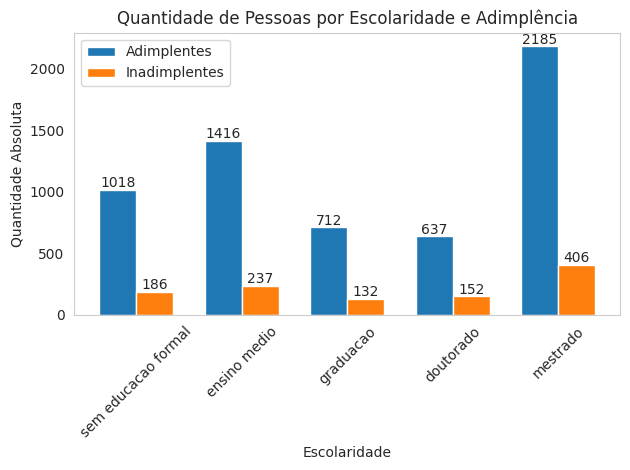

In [12]:
# Separar os dados por default 0 e default 1
quantidades_default0 = quantidade_por_escolaridade_default[quantidade_por_escolaridade_default['default'] == 0]['quantidade']
quantidades_default1 = quantidade_por_escolaridade_default[quantidade_por_escolaridade_default['default'] == 1]['quantidade']

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicoes = np.arange(len(ordem_escolaridade))

# Plotar as barras para default 0
plt.bar(posicoes, quantidades_default0, largura_barra, label='Adimplentes')

# Plotar as barras para default 1 ao lado de default 0
plt.bar(posicoes + largura_barra, quantidades_default1, largura_barra, label='Inadimplentes')

# Adicionar rótulos e legendas
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade Absoluta')
plt.title('Quantidade de Pessoas por Escolaridade e Adimplência')
plt.xticks(posicoes + largura_barra / 2, ordem_escolaridade, rotation=45, ha='center')
plt.legend()

# Adicionar os valores acima das barras
for i in range(len(posicoes)):
    plt.text(posicoes[i], quantidades_default0.iloc[i] + 20, str(quantidades_default0.iloc[i]), ha='center')
    plt.text(posicoes[i] + largura_barra, quantidades_default1.iloc[i] + 20, str(quantidades_default1.iloc[i]), ha='center')

# Exibir o gráfico
plt.tight_layout()
plt.grid()
plt.show()


Visto que a maioria dos clientes possui um mestrado, porém mostrarei um gráfico em porcentagem para vermos em qual a taxa de inadimplência é mais frequente

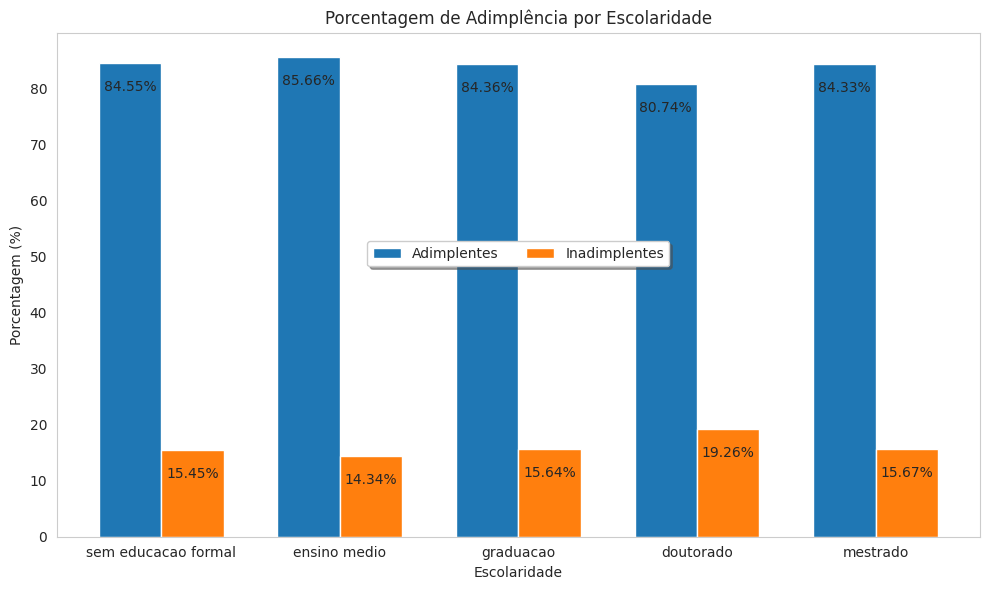

In [13]:
# Dados para o gráfico
escolaridades = porcentagem_default0_por_escolaridade.index
porcentagens_default0 = porcentagem_default0_por_escolaridade.values
porcentagens_default1 = porcentagem_default1_por_escolaridade.values

# Configurações para o gráfico
largura_barra = 0.35
posicoes = np.arange(len(escolaridades))

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barra_default0 = ax.bar(posicoes - largura_barra/2, porcentagens_default0, largura_barra, label='Adimplentes')
barra_default1 = ax.bar(posicoes + largura_barra/2, porcentagens_default1, largura_barra, label='Inadimplentes')

# Adicionar rótulos e título
ax.set_xlabel('Escolaridade')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Porcentagem de Adimplência por Escolaridade')
ax.set_xticks(posicoes)
ax.set_xticklabels(escolaridades, rotation=0, ha='center')

# Adicionar os valores acima das barras
for i in range(len(escolaridades)):
    ax.annotate(f'{porcentagens_default0[i]:.2f}%', (posicoes[i] - largura_barra/2, porcentagens_default0[i] - 5), ha='center')
    ax.annotate(f'{porcentagens_default1[i]:.2f}%', (posicoes[i] + largura_barra/2, porcentagens_default1[i] - 5), ha='center')

# Mostrar a legenda abaixo do gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.6), shadow=True, ncol=2)

# Mostrar o gráfico
plt.tight_layout()
plt.grid()
plt.show()

Com isso percebemos que os clientes com doutorado tendem a ser quase 25% mais inadimplentes em comparação aos que possuem mestrado e quase 35% mais inadimplentes que clientes que possuem apenas o ensino médio completo, contudo outros valores devem contribuir para isso, iremos explorar as possibilidades a seguir.

# Conferindo  Idades

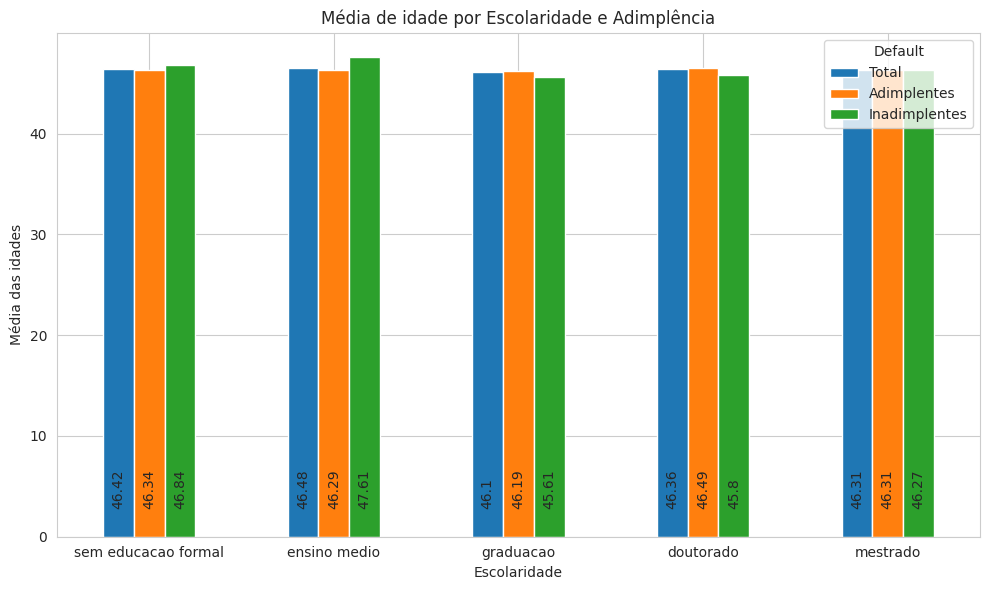

In [14]:
valores_escolaridade = df['escolaridade'].unique()
valores_default = df['default'].unique()

# Dicionário para armazenar as médias de idade
medias_idade = {}



# Loop sobre os valores únicos de escolaridade
for escolaridade in ordem_escolaridade:
    # Calcular a média total de idade para cada escolaridade
    media_total = round(df[df['escolaridade'] == escolaridade]['idade'].mean(), 2)
    medias_idade[f'{escolaridade}'] = [media_total]

    # Loop sobre os valores únicos de default
    for default in valores_default:
        # Calcular a média de idade para cada escolaridade e default
        media_default = round(df[(df['escolaridade'] == escolaridade) & (df['default'] == default)]['idade'].mean(), 2)
        medias_idade[f'{escolaridade}'].append(media_default)

# Converter o dicionário em um DataFrame
df_medias = pd.DataFrame.from_dict(medias_idade, orient='index', columns=['Total', 'Adimplentes', 'Inadimplentes'])

# Plotar gráfico de barras
ax = df_medias.plot(kind='bar', figsize=(10, 6))
plt.title('Média de idade por Escolaridade e Adimplência')
plt.xlabel('Escolaridade')
plt.ylabel('Média das idades')

plt.legend(title='Default')
posicoes_xticks = range(len(df_medias.index))

plt.xticks(posicoes_xticks, df_medias.index, rotation=0, ha='center')

# Adicionar a porcentagem encima das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, height * 0 + 3), ha='center', rotation=90)


plt.tight_layout()
plt.show()

A média das idades se mantêm parecida independente da escolaridade.

# Vamos conferir a média salarial para cada categoria com base na escolaridade


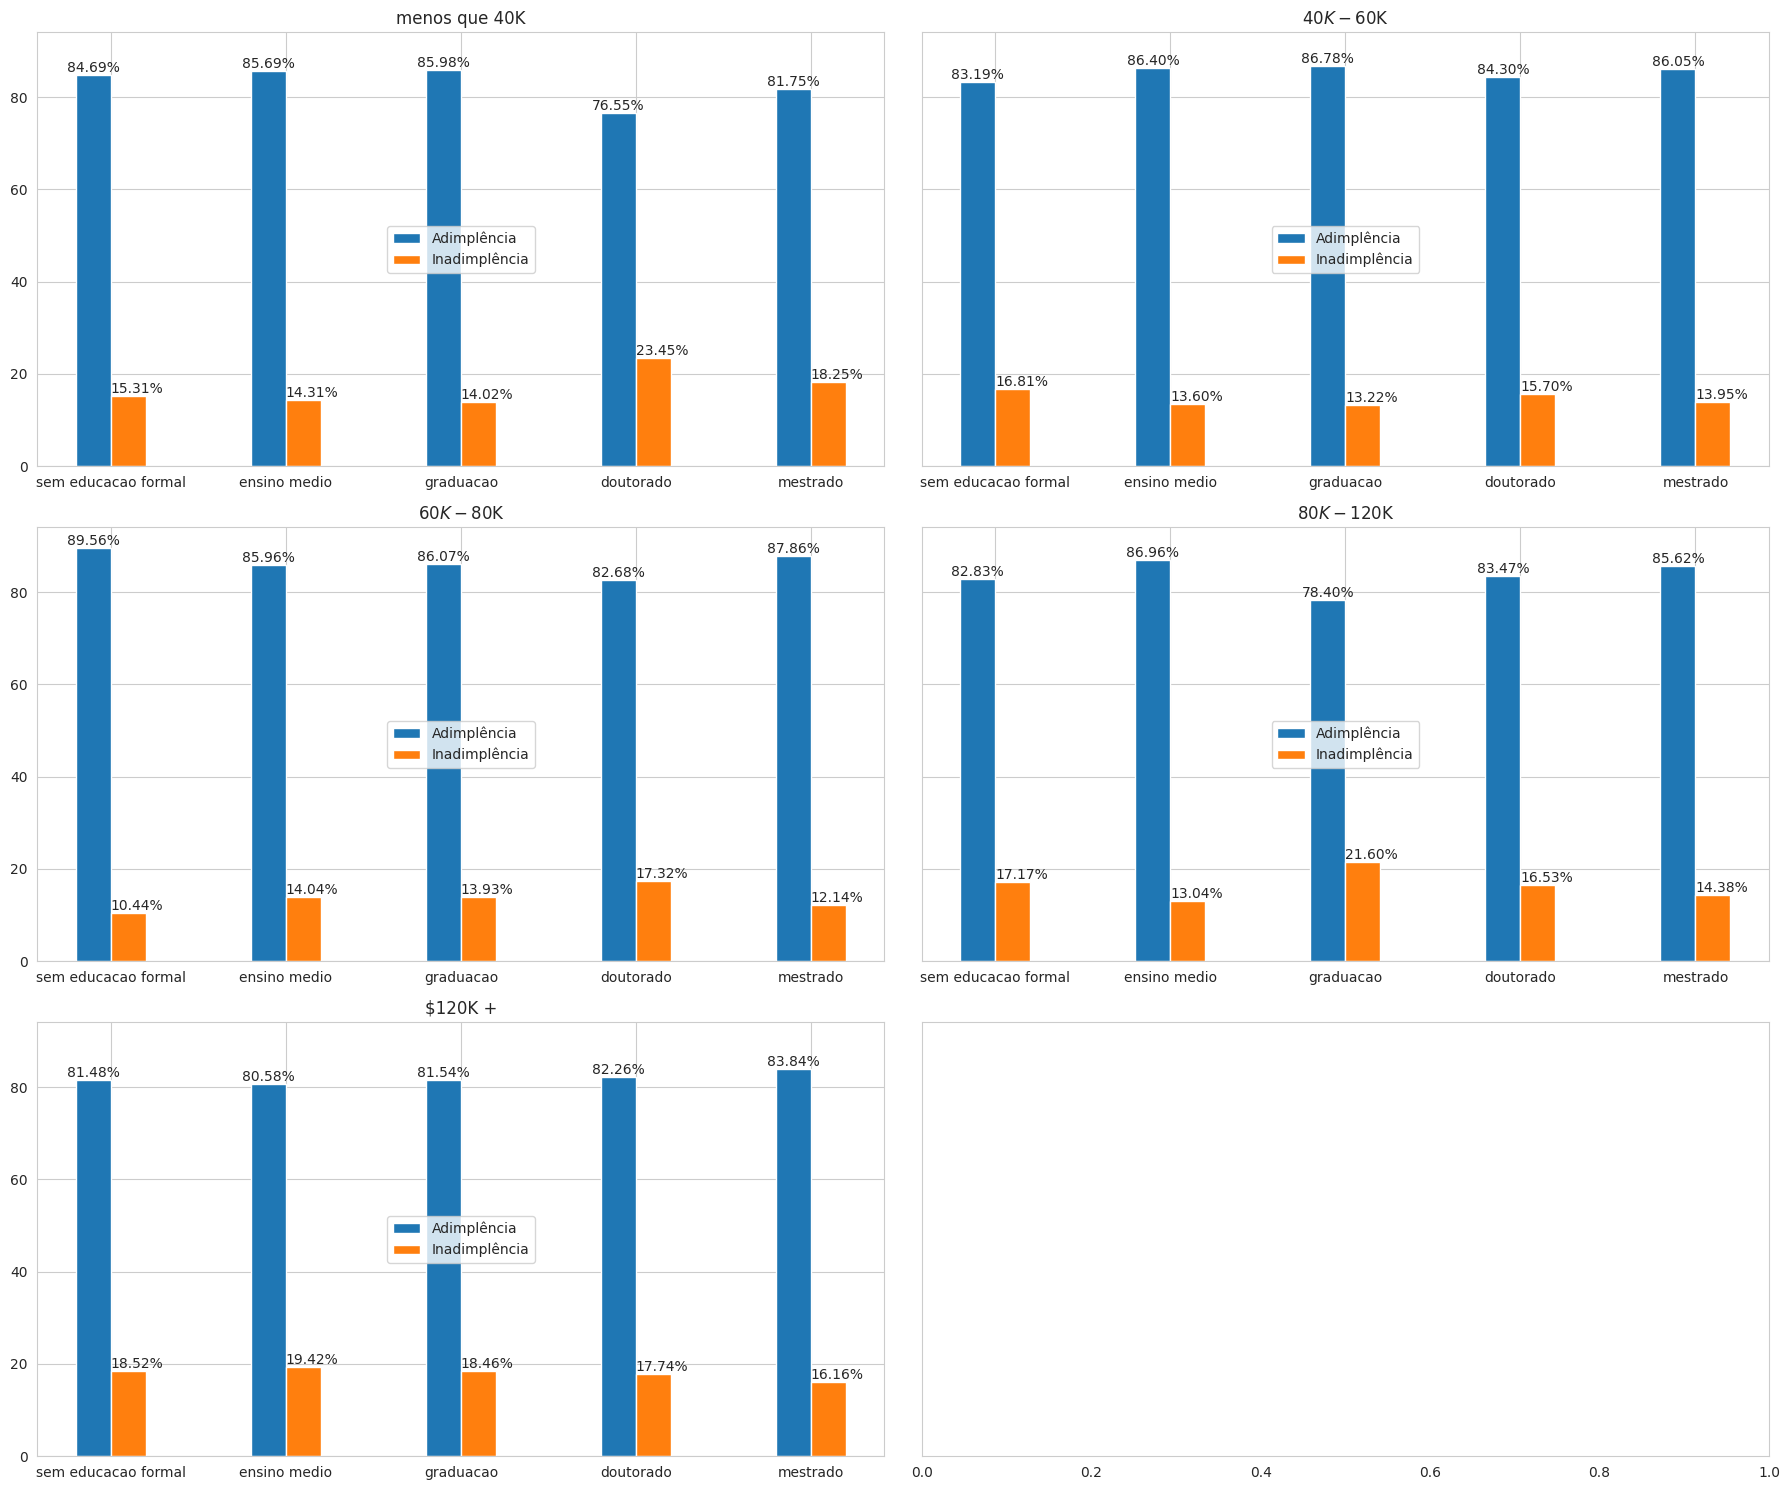

In [15]:
#  Definir os intervalos de salário anual
intervalos_salario = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Criar um DataFrame para armazenar os resultados
resultados = pd.DataFrame()

# Loop sobre as categorias de escolaridade
for escolaridade in ordem_escolaridade:
    # Filtrar o DataFrame para a escolaridade atual
    df_escolaridade = df[df['escolaridade'] == escolaridade].copy()  # Usar .copy() para evitar o SettingWithCopyWarning

    # Remover duplicatas
    df_escolaridade.drop_duplicates(inplace=True)  # Usar inplace=True para modificar o DataFrame original

    # Contar a quantidade de cada intervalo de salário anual para cada categoria de escolaridade, dividido por default
    contagem_salario = df_escolaridade.groupby(['salario_anual', 'default']).size().unstack(fill_value=0)

    # Renomear as colunas
    contagem_salario.columns = ['Default0', 'Default1']

    # Adicionar a contagem para a escolaridade atual ao DataFrame de resultados
    resultados = pd.concat([resultados, contagem_salario], axis=0)

# Separar os dados por intervalo de salário anual
salario_60_80 = resultados.loc['$60K - $80K'].copy()
salario_40 = resultados.loc['menos que $40K'].copy()
salario_80_120 = resultados.loc['$80K - $120K'].copy()
salario_40_60 = resultados.loc['$40K - $60K'].copy()
salario_120 = resultados.loc['$120K +'].copy()

# Calcular as porcentagens
salario_60_80['Total'] = salario_60_80.sum(axis=1)
salario_40['Total'] = salario_40.sum(axis=1)
salario_80_120['Total'] = salario_80_120.sum(axis=1)
salario_40_60['Total'] = salario_40_60.sum(axis=1)
salario_120['Total'] = salario_120.sum(axis=1)

salario_60_80_pct = salario_60_80.div(salario_60_80['Total'], axis=0) * 100
salario_40_pct = salario_40.div(salario_40['Total'], axis=0) * 100
salario_80_120_pct = salario_80_120.div(salario_80_120['Total'], axis=0) * 100
salario_40_60_pct = salario_40_60.div(salario_40_60['Total'], axis=0) * 100
salario_120_pct = salario_120.div(salario_120['Total'], axis=0) * 100

# Plotar os gráficos
fig, axs = plt.subplots(3, 2, figsize=(18, 15), sharey=True)  # 3 linhas, 2 colunas

largura_barra = 0.2  # Ajuste a largura das barras conforme necessário

# Função para adicionar os valores acima das barras
def adicionar_valores_barras(ax, dados, offset):
    for i, v in enumerate(dados):
        if v != 0:  # Evita adicionar valor 0 acima da barra
            ax.text(i + offset, v + 0, f'{v:.2f}%', ha='center', va='bottom')

# Gráfico para menos que $40K
if not salario_40.empty:
    axs[0, 0].bar(range(len(ordem_escolaridade)), salario_40_pct['Default0'], width=largura_barra, label='Adimplência')
    axs[0, 0].bar([x + largura_barra for x in range(len(ordem_escolaridade))], salario_40_pct['Default1'], width=largura_barra, label='Inadimplência')
    axs[0, 0].set_title('menos que 40K')
    axs[0, 0].set_xticks([x + largura_barra / 2 for x in range(len(ordem_escolaridade))])
    axs[0, 0].set_xticklabels(ordem_escolaridade, rotation=0, ha='center')
    axs[0, 0].legend(loc='center')
    adicionar_valores_barras(axs[0, 0], salario_40_pct['Default0'], 0)
    adicionar_valores_barras(axs[0, 0], salario_40_pct['Default1'], 0.25)


# Gráfico para $40K - $60K
if not salario_40_60.empty:
    axs[0, 1].bar(range(len(ordem_escolaridade)), salario_40_60_pct['Default0'], width=largura_barra, label='Adimplência')
    axs[0, 1].bar([x + largura_barra for x in range(len(ordem_escolaridade))], salario_40_60_pct['Default1'], width=largura_barra, label='Inadimplência')
    axs[0, 1].set_title('$40K - $60K')
    axs[0, 1].set_xticks([x + largura_barra / 2 for x in range(len(ordem_escolaridade))])
    axs[0, 1].set_xticklabels(ordem_escolaridade, rotation=0, ha='center')
    axs[0, 1].legend(loc='center')
    adicionar_valores_barras(axs[0, 1], salario_40_60_pct['Default0'], 0)
    adicionar_valores_barras(axs[0, 1], salario_40_60_pct['Default1'], 0.25)



# Gráfico para $60K - $80K
if not salario_60_80.empty:
    axs[1, 0].bar(range(len(ordem_escolaridade)), salario_60_80_pct['Default0'], width=largura_barra, label='Adimplência')
    axs[1, 0].bar([x + largura_barra for x in range(len(ordem_escolaridade))], salario_60_80_pct['Default1'], width=largura_barra, label='Inadimplência')
    axs[1, 0].set_title('$60K - $80K')
    axs[1, 0].set_xticks([x + largura_barra / 2 for x in range(len(ordem_escolaridade))])
    axs[1, 0].set_xticklabels(ordem_escolaridade, rotation=0, ha='center')
    axs[1, 0].legend(loc='center')
    adicionar_valores_barras(axs[1, 0], salario_60_80_pct['Default0'], 0)
    adicionar_valores_barras(axs[1, 0], salario_60_80_pct['Default1'], 0.25)



# Gráfico para $80K - $120K
if not salario_80_120.empty:
    axs[1, 1].bar(range(len(ordem_escolaridade)), salario_80_120_pct['Default0'], width=largura_barra, label='Adimplência')
    axs[1, 1].bar([x + largura_barra for x in range(len(ordem_escolaridade))], salario_80_120_pct['Default1'], width=largura_barra, label='Inadimplência')
    axs[1, 1].set_title('$80K - $120K')
    axs[1, 1].set_xticks([x + largura_barra / 2 for x in range(len(ordem_escolaridade))])
    axs[1, 1].set_xticklabels(ordem_escolaridade, rotation=0, ha='center')
    axs[1, 1].legend(loc='center')
    adicionar_valores_barras(axs[1, 1], salario_80_120_pct['Default0'], 0)
    adicionar_valores_barras(axs[1, 1], salario_80_120_pct['Default1'], 0.25)



# Gráfico para $120K +
if not salario_120.empty:
    axs[2, 0].bar(range(len(ordem_escolaridade)), salario_120_pct['Default0'], width=largura_barra, label='Adimplência')
    axs[2, 0].bar([x + largura_barra for x in range(len(ordem_escolaridade))], salario_120_pct['Default1'], width=largura_barra, label='Inadimplência')
    axs[2, 0].set_title('$120K +')
    axs[2, 0].set_xticks([x + largura_barra / 2 for x in range(len(ordem_escolaridade))])
    axs[2, 0].set_xticklabels(ordem_escolaridade, rotation=0, ha='center')
    axs[2, 0].legend(loc='center')
    adicionar_valores_barras(axs[2, 0], salario_120_pct['Default0'], 0)
    adicionar_valores_barras(axs[2, 0], salario_120_pct['Default1'], 0.25)

# Remover a grade dos gráficos
plt.grid(False)

# Adicionar espaço entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()


**Descobertas**

*Renda anual menor que 40k*

1.  A média de inadimplência é de 17.06% entre os clientes dessa faixa salarial

2.  Cliente com mestrado demonstram um pequeno aumento na taxa de inadimplência indo para 18.25%

3.  Clientes com doutorado demonstram um grande aumento, sendo 23,45% dos clientes inadimplentes


*Renda anual entre: 40k e 60k*

1. A média de inadimplência é de 14.65% entre os clientes dessa faixa salarial

2. Clientes sem educação formal demonstram um leve acréscimo na taxa de inadimplência, sendo de 16.81%


*Renda anual entre 60k - 80k*

1. A média de inadimplência é de 13.57% entre os clientes dessa faixa salarial

2. Clientes com doutorado possuem um grande acréscimo, sendo 17.32% dos clientes inadimplentes


*Renda anual entre 80k - 120k*

1. A média de inadimplência é de 16.53% entre os clientes dessa faixa salarial

2. Clientes que possuem graduação apresentam uma maior taxa da inadimplência com 21.60%


*Renda anual acima de 120k*

1. Clientes com renda anual acima de 120k apresentam a maior média de inadimplência, sendo de 18.13%, porém não apresentam flutuações no valor.

# Vamos ver a quantidade e valores das transações nos últimos 12 meses por grau de escolaridade


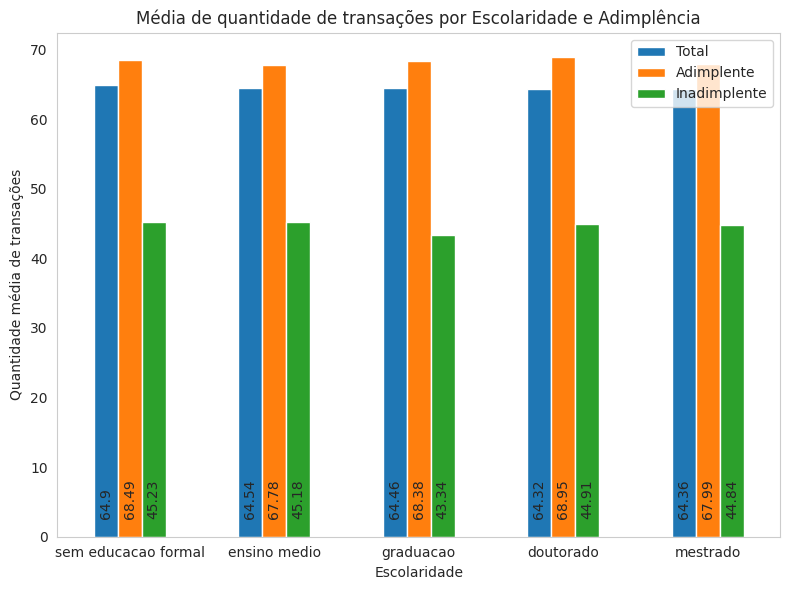

In [16]:
# Obter os valores únicos de default
valores_default = df['default'].unique()

# Dicionário para armazenar as médias de qtd_transacoes_12m
medias_qtd_transacoes_12m = {}

# Loop sobre as categorias de escolaridade na ordem desejada
for escolaridade in ordem_escolaridade:
    # Calcular a média total de qtd_transacoes_12m para cada escolaridade
    media_total = round(df[df['escolaridade'] == escolaridade]['qtd_transacoes_12m'].mean(), 2)
    medias_qtd_transacoes_12m[f'{escolaridade}'] = [media_total]

    # Loop sobre os valores únicos de default
    for default in valores_default:
        # Calcular a média de qtd_transacoes_12m para cada escolaridade e default
        media_default = round(df[(df['escolaridade'] == escolaridade) & (df['default'] == default)]['qtd_transacoes_12m'].mean(), 2)
        medias_qtd_transacoes_12m[f'{escolaridade}'].append(media_default)

# Converter o dicionário em um DataFrame
df_medias = pd.DataFrame.from_dict(medias_qtd_transacoes_12m, orient='index', columns=['Total', 'Adimplente', 'Inadimplente'])

# Plotar gráfico de barras
ax = df_medias.plot(kind='bar', figsize=(8, 6))
plt.title('Média de quantidade de transações por Escolaridade e Adimplência')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade média de transações')
plt.xticks(rotation=0, ha='center')


# Adicionar a porcentagem encima das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, height * 0 + 3), ha='center', rotation=90)

plt.tight_layout()
plt.grid()
plt.show()

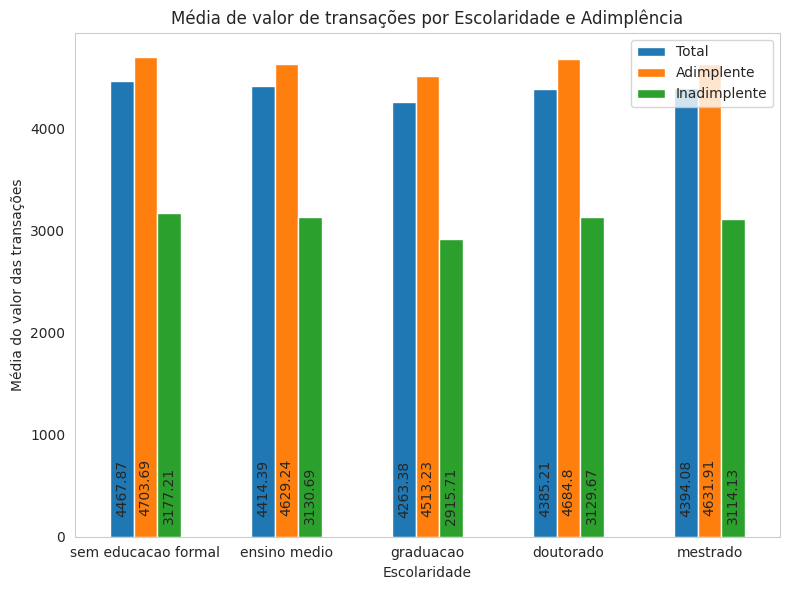

In [17]:
medias_valor_transacoes_12m = {}

# Loop sobre as categorias de escolaridade na ordem desejada
for escolaridade in ordem_escolaridade:
    # Calcular a média total de valor_transacoes_12m para cada escolaridade
    media_total = round(df[df['escolaridade'] == escolaridade]['valor_transacoes_12m'].mean(), 2)
    medias_valor_transacoes_12m[f'{escolaridade}'] = [media_total]

    # Loop sobre os valores únicos de default
    for default in valores_default:
        # Calcular a média de valor_transacoes_12m para cada escolaridade e default
        media_default = round(df[(df['escolaridade'] == escolaridade) & (df['default'] == default)]['valor_transacoes_12m'].mean(), 2)
        medias_valor_transacoes_12m[f'{escolaridade}'].append(media_default)

# Converter o dicionário em um DataFrame
df_medias = pd.DataFrame.from_dict(medias_valor_transacoes_12m, orient='index', columns=['Total', 'Adimplente', 'Inadimplente'])

# Plotar gráfico de barras
ax = df_medias.plot(kind='bar', figsize=(8, 6))
plt.title('Média de valor de transações por Escolaridade e Adimplência')
plt.xlabel('Escolaridade')
plt.ylabel('Média do valor das transações')
plt.xticks(rotation=0, ha='center')


# Adicionar a porcentagem encima das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height * .05), ha='center', rotation=90)

plt.tight_layout()
plt.grid()
plt.show()

Visto que os clientes realizam transações em porcentagem similares independente de seu grau de escolaridade. Os valores se mantêm parecidos.

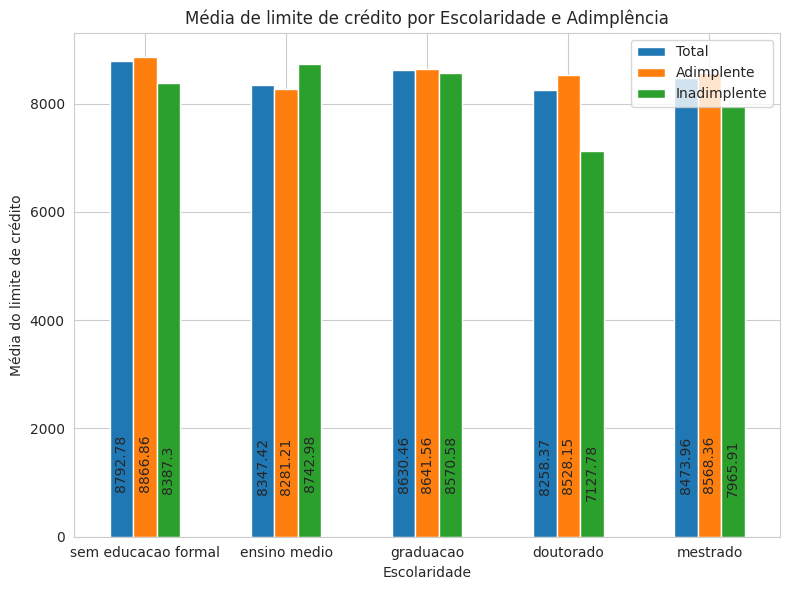

In [18]:
# Definir a ordem desejada para as categorias de escolaridade
ordem_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'doutorado', 'mestrado']

# Obter os valores únicos de default
valores_default = df['default'].unique()

# Dicionário para armazenar as médias de limite_credito
medias_limite_credito = {}

# Loop sobre as categorias de escolaridade na ordem desejada
for escolaridade in ordem_escolaridade:
    # Calcular a média total de limite_credito para cada escolaridade
    media_total = round(df[df['escolaridade'] == escolaridade]['limite_credito'].mean(), 2)
    medias_limite_credito[f'{escolaridade}'] = [media_total]

    # Loop sobre os valores únicos de default
    for default in valores_default:
        # Calcular a média de limite_credito para cada escolaridade e default
        media_default = round(df[(df['escolaridade'] == escolaridade) & (df['default'] == default)]['limite_credito'].mean(), 2)
        medias_limite_credito[f'{escolaridade}'].append(media_default)

# Converter o dicionário em um DataFrame
df_medias = pd.DataFrame.from_dict(medias_limite_credito, orient='index', columns=['Total', 'Adimplente', 'Inadimplente'])

# Plotar gráfico de barras
ax = df_medias.plot(kind='bar', figsize=(8, 6))
plt.title('Média de limite de crédito por Escolaridade e Adimplência')
plt.xlabel('Escolaridade')
plt.ylabel('Média do limite de crédito')
plt.xticks(rotation=0, ha='center')


# Adicionar a porcentagem encima das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height * .1), ha='center', rotation=90)

plt.tight_layout()

plt.show()

**Descoberta**

Mesmo fazendo transações muito similares, tanto no (quantidade) de transações quanto em quantidade de dinheiro envolvido. Clientes com doutorado possuem uma média menor de crédito, facilitando para ficarem inadimplentes.